# <span style="color:blue"> Esercitazione 6 - Modello di Ising </span>

## <span style="color:blue"> Indice</span>

- [Esercizio 6.1 - Simulazione del modello di Ising 1D](#Esercizio6.1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## <span id="Esercizio6.1" style="color:blue">  Esercizio 6.1 - Simulazione del modello di Ising 1D </span>[^](#toc)

### Generalità

Il modello di Ising è un modello di meccanica statistica utilizzato per descrivere sistemi magnetici, i quali vengono approssimati come fossero costituiti da spin discreti che possono assumere valori in $\{-1,1\}$, disposti in un reticolo, e interagenti solo
- con i loro primi vicini, tramite un termine di accoppiamento $J$;
- con un eventuale campo magnetico esterno, $h$.

Il modello in una dimensione vede il sistema costituito da una catena di spin. In questo esercizio, sono stati considerati
- $N$ spin $\{ s_i \}_{i=1}^N$;
- materiale ferromagnetico ($J>0$)
- condizioni al contorno periodiche (si pone $s_{N+1}=s_{1}$), per simulare un sistema infinito;
- unità di misura ridotte

In questo caso, l'Hamiltoniana del sistema è $$H =-J\sum_{i=1}^N s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1})=-J\sum_{i=1}^N s_i s_{i+1}-h\sum_{i=1}^N s_i $$

In questo esercizio è stato simulato questo modello. Essendo esso risolubile esattamente, è possibile confrontare i risultati ottenuti con le formule analitiche ricavate dalla teoria.

Le grandezze di interesse, espresse già in unità ridotte, sono le seguenti:
- **Energia interna per spin**, per $h=0$:
    - essa è il valor medio (d'ensemble) dell'Hamiltoniana (energia), diviso per il numero di particelle: $$\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}$$
    - la formula analitica, ricavata dalla teoria, che si può confrontare col risultato, è la seguente: $$\frac{U(N,T)}{N}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)$$


- **Calore specifico**, per $h=0$:
    - esso è proporzionale alla varianza d'insieme dell'energia
$$\frac{C(N,T)}{N}=\frac{\beta^2}{N} \left\{ \sum_{\{ s_i \}} H^2 \frac{\exp \left( -\beta H\right)}{Z} - \left[ \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}\right]^2 \right\}=\frac{\beta^2}{N} \left(\langle H^2 \rangle -\langle H \rangle^2 \right)$$
    - e la formula analitica è la seguente: $$\frac{C(N,T)}{N}=(\beta J)^2 \left\{ 1+\tanh^N (\beta J)+(N-1)\tanh^2 (\beta J)+(N-1)\frac{\tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)}- N \left[ \frac{\tanh (\beta J) + \tanh^{N-1} (\beta J)}{1+\tanh^N (\beta J)} \right]^2 \right\}$$

- **Magnetizzazione per spin**, per $h \not= 0$, poiché per $h=0$, in una dimensione, essa è sempre nulla:
    - essa è proporzionale al valor medio della somma degli spin del sistema:
$$ \frac{M(N,T,h)}{N}= \frac{1}{N}\sum_{\{ s_i \}} \left[ \sum_{i=1,N}s_i\right] \frac{\exp \left( -\beta H\right)}{Z} =\frac{1}{N} \left\langle \sum_{i=1,N}s_i \right\rangle$$
    - la formula esatta è: $$
\frac{M(N,T,h)}{N}=\frac{e^{\beta J}\; \sinh(\beta h)}{Z} \; \Bigl[\lambda_1^{N-1}\cdot \Bigl(1+\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr) + \lambda_2^{N-1}\cdot \Bigl(1-\frac{e^{\beta J}\; \cosh(\beta h)}{\sqrt{e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J)}}\Bigr)\Bigr]
$$
      con $\lambda_{1,2} =e^{\beta J} \cosh (\beta h) \pm \left[ e^{2\beta J} \cosh^2 (\beta h) - 2\sinh (2\beta J) \right]^{1/2}$

- **Suscettività magnetica per spin**, per $h=0$:
    - essa è proporzionale al valore quadratico medio della somma degli spin del sistema: $$\frac{\chi(N,T)}{N}= \beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right]$$
    - questa formula è confrontabile con $$\frac{\chi(N,T)}{N}= \beta e^{2\beta J} \Biggl( \frac{1-\tanh^N (\beta J)}{1+\tanh^N (\beta J)} \Biggl)$$


Le formule con significato statistico si prestano naturalmente a un’implementazione Monte Carlo: campionando le configurazioni del sistema secondo il peso di Boltzmann $\exp(-\beta H)$, tramite l’algoritmo di Metropolis o quello di Gibbs, è sufficiente valutare le grandezze di interesse su ciascuna configurazione generata e calcolarne le opportune medie statistiche (media, varianza, ecc.).

Il campionamento prodotto da tali algoritmi assegna automaticamente maggiore probabilità alle configurazioni energeticamente più favorevoli. Di conseguenza, le medie calcolate su un numero sufficientemente grande di step Monte Carlo coincidono con i valori d’ensemble del sistema termodinamico simulato.

Si noti che non è necessario conoscere esplicitamente la funzione di partizione $Z$: sia l’algoritmo di Metropolis sia quello di Gibbs richiedono soltanto la distribuzione di probabilità a meno della costante di normalizzazione, che si semplifica nei rapporti di probabilità.

### Gli algoritmi di campionamento

Nell'esercizio sono stati implementati gli algoritmi di campionamento di Metropolis e di Gibbs. Per maggiori dettagli sul primo, si rimanda alla descrizione fatta nell'Esercitazione 5. L'algoritmo di Gibbs (o heat bath), invece, può essere descritto in breve così:
- esso aggiorna uno spin alla volta estraendone direttamente il nuovo valore dalla distribuzione di probabilità condizionata agli altri spin del sistema.
    - Nel caso del modello di Ising 1D, fissati gli spin primi vicini di $s_i$, si considerano le due possibili configurazioni locali $s_i=+1$ e $s_i=-1$. Le rispettive probabilità sono proporzionali ai pesi di Boltzmann:
$$
P(s_i=\pm 1 \mid \{s_{j \neq i}\})=\frac{e^{-\beta E(s_i=\pm 1)}}{e^{-\beta E(s_i=+1)} + e^{-\beta E(s_i=-1)}}
$$

    - Si hanno quindi $$P(s_i=+1)=\frac{1}{1 + \exp\left[-2\beta\left(J(s_{i-1}+s_{i+1}) + h\right)\right]} \mathrm{,} \quad P(s_i=-1)=\frac{1}{1 + \exp\left[+2\beta\left(J(s_{i-1}+s_{i+1}) + h\right)\right]}$$

    - Lo spin viene quindi riassegnato a $\pm 1$ secondo questa probabilità.
- A differenza dell’algoritmo di Metropolis, non esiste una fase di accettazione o rifiuto della mossa: il nuovo valore viene sempre accettato. In questo senso, l'algoritmo può essere visto come un caso particolare del Metropolis in cui la probabilità di accettazione è sempre pari a $1$.

È importante evidenziare che, in questo esercizio, la “nuova” configurazione non viene proposta campionando una posizione nello spazio (non vi sono coordinate), ma proponendo il flip di uno spin scelto a caso, estratto con distribuzione uniforme tra i $N$ spin del sistema.
Nel caso dell’algoritmo di Metropolis, questo significa proporre la trasformazione $s_i \to -s_i$ per un indice $i$ scelto uniformemente in ${1,\dots,N}$. In questo modo la probabilità di proposta è simmetrica, e l’accettazione dipende unicamente dalla variazione di energia.

### Il calcolo

Il programma sviluppato calcola dunque le seguenti grandezze: 
1. Energia interna per spin per $h=0$: $$\frac{U(N,T)}{N} = \frac{1}{N}\langle H \rangle_{h=0}$$
2. Calore specifico per $h=0$: $$\frac{C(N,T)}{N}=\frac{\beta^2}{N} (\langle H^2 \rangle_{h=0}-\langle H \rangle_{h=0}^2)$$
3. Magnetizzazione per spin per $h=0.02$: $$\frac{M(N,T,h=0.02)}{N}= \frac{1}{N}\langle \sum_{i=1,N}s_i \rangle_{h=0.02}$$
4. Suscettività magnetica per spin per $h=0$: $$\frac{\chi(N,T)}{N} = \frac{\beta}{N} \langle (\sum_{i=1,N}s_i)^2 \rangle_{h=0}$$

Nelle seguenti condizioni:
- $N=50$ spin
- $J=1$
- temperature $T=0.5, 0.6, \dots, 2.0$

Sfruttando due diversi algoritmi di campionamento
1. Algoritmo di Metropolis
2. Algoritmo di Gibbs

Inoltre:
- prima di ogni simulazione è stata eseguita l'equilibrazione;
- per ogni simulazione equilibrata sono stati eseguiti $M=10^6$ step, e il valore e l'incertezza di ogni grandezza sono stati ottenuti mediante la tecnica della media a blocchi, con $N=100$ blocchi.

La simulazione di equilibrazione, per ogni caso, è stata eseguita con $2000$ blocchi di lunghezza $10$. Di seguito si mostrano i risultati di un processo di equilibrazione per le quattro grandezze (la magnetizzazione è mostrata per $h=0.02$) nel caso di $T=2.0$. I valori delle grandezze sono normalizzati rispetto al valore sull'ultimo blocco

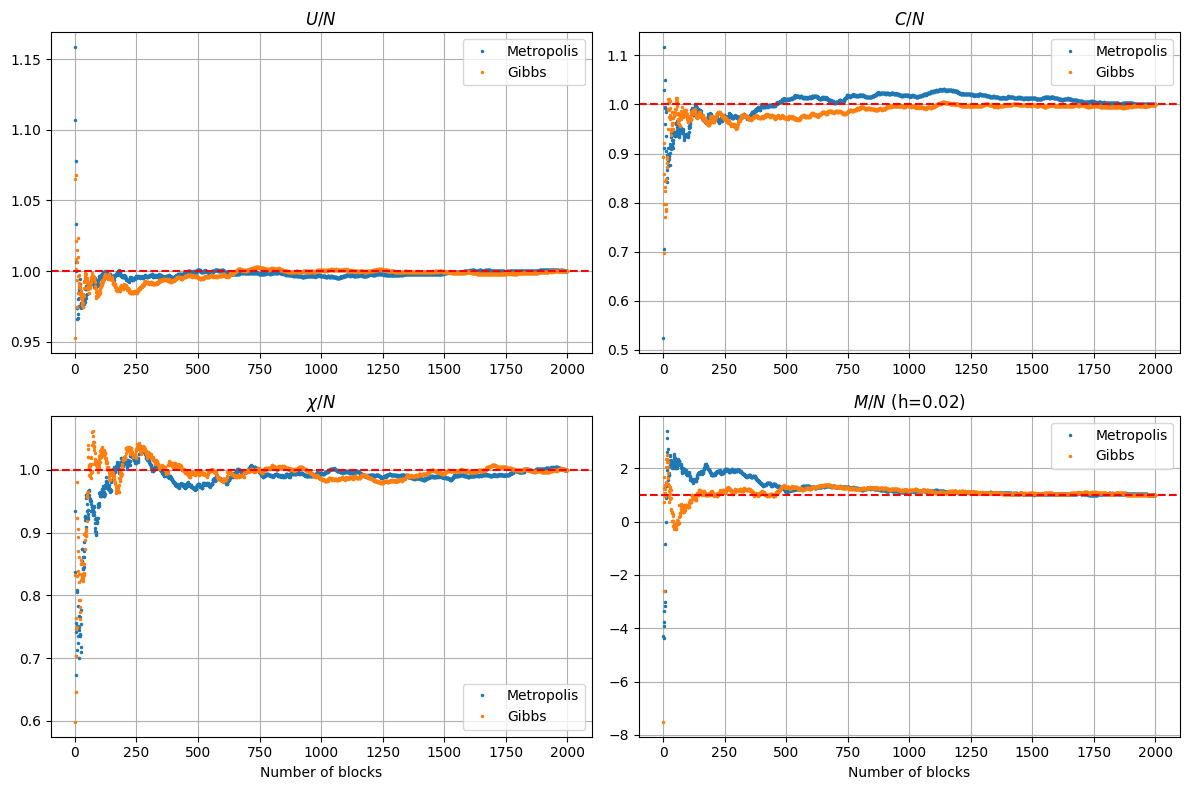

In [2]:
# Base paths
base_path = "../Es06_01/Output/"
# ---------- h = 0 ----------
path_Metro_h0=base_path+"h000/Metropolis/"
path_Gibbs_h0=base_path+"h000/Gibbs/"
Block,U_M=np.loadtxt(path_Metro_h0+f"ene_T2.00_eq.dat",usecols=(0,2),unpack=True)
_,C_M    =np.loadtxt(path_Metro_h0+f"heat_T2.00_eq.dat",usecols=(0,2),unpack=True)
_,Chi_M  =np.loadtxt(path_Metro_h0+f"chi_T2.00_eq.dat",usecols=(0,2),unpack=True)
_,U_G    =np.loadtxt(path_Gibbs_h0+f"ene_T2.00_eq.dat",usecols=(0,2),unpack=True)
_,C_G    =np.loadtxt(path_Gibbs_h0+f"heat_T2.00_eq.dat",usecols=(0,2),unpack=True)
_,Chi_G  =np.loadtxt(path_Gibbs_h0+f"chi_T2.00_eq.dat",usecols=(0,2),unpack=True)
# ---------- h = 0.02 ----------
path_Metro_h002=base_path+"h002/Metropolis/"
path_Gibbs_h002=base_path+"h002/Gibbs/"
_,M_M=np.loadtxt(path_Metro_h002+f"mag_T2.00_eq.dat",usecols=(0,2),unpack=True)
_,M_G=np.loadtxt(path_Gibbs_h002+f"mag_T2.00_eq.dat",usecols=(0,2),unpack=True)

# Normalize
U_M  =U_M/U_M[-1]
C_M  =C_M/C_M[-1]
Chi_M=Chi_M/Chi_M[-1]
U_G  =U_G/U_G[-1]
C_G  =C_G/C_G[-1]
Chi_G=Chi_G/Chi_G[-1]
M_M  =M_M/M_M[-1]
M_G  =M_G/M_G[-1]

# Plot
fig,axs=plt.subplots(2,2,figsize=(12,8))
axs=axs.flatten()
# U
axs[0].plot(Block,U_M,'.',markersize=3,label='Metropolis')
axs[0].plot(Block,U_G,'.',markersize=3,label='Gibbs')
axs[0].axhline(1.0,color='r',linestyle='--')
axs[0].set_title(r'$U/N$')
axs[0].grid(True)
axs[0].legend()
# C
axs[1].plot(Block,C_M,'.',markersize=3,label='Metropolis')
axs[1].plot(Block,C_G,'.',markersize=3,label='Gibbs')
axs[1].axhline(1.0,color='r',linestyle='--')
axs[1].set_title(r'$C/N$')
axs[1].grid(True)
axs[1].legend()
# Chi
axs[2].plot(Block,Chi_M,'.',markersize=3,label='Metropolis')
axs[2].plot(Block,Chi_G,'.',markersize=3,label='Gibbs')
axs[2].axhline(1.0,color='r',linestyle='--')
axs[2].set_title(r'$\chi/N$')
axs[2].set_xlabel('Number of blocks')
axs[2].grid(True)
axs[2].legend()
# M (h=0.02)
axs[3].plot(Block,M_M,'.',markersize=3,label='Metropolis')
axs[3].plot(Block,M_G,'.',markersize=3,label='Gibbs')
axs[3].axhline(1.0,color='r',linestyle='--')
axs[3].set_title(r'$M/N$ (h=0.02)')
axs[3].set_xlabel('Number of blocks')
axs[3].grid(True)
axs[3].legend()
plt.tight_layout()
plt.show()

Si nota come le sequenze di dati si equilibrino dopo il numero di passi selezionato ($20000$ step Monte Carlo).

### Risultati

Di seguito sono riportati i grafici delle grandezze calcolate (valor medio e incertezza statistica stimata tramite media a blocchi) con entrambi gli algoritmi di campionamento, al variare della temperatura $T$, confrontati con l’andamento teorico atteso.

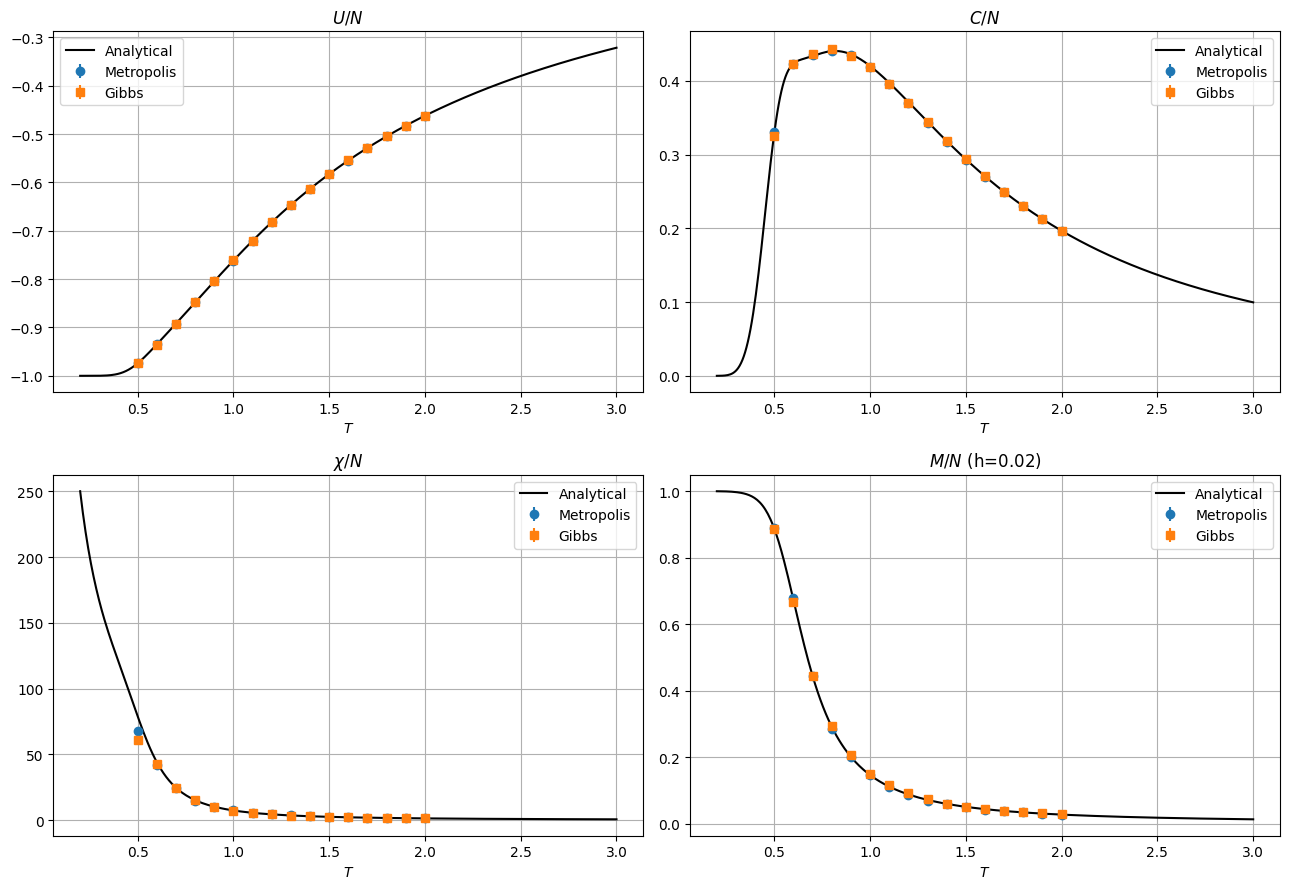

In [3]:
# ---------- Monte Carlo data ----------
temps=np.round(np.arange(0.5,2.01,0.1),2)
temps_str=[f"{T:.2f}" for T in temps]
U_M,U_G=[],[]
C_M,C_G=[],[]
Chi_M,Chi_G=[],[]
M_M,M_G=[],[]
errU_M,errU_G=[],[]
errC_M,errC_G=[],[]
errChi_M,errChi_G=[],[]
errM_M,errM_G=[],[]

for T in temps_str:
    # h = 0
    path_M_h0=base_path+"h000/Metropolis/"
    path_G_h0=base_path+"h000/Gibbs/"
    ene_M =np.loadtxt(path_M_h0+f"ene_T{T}.dat")
    heat_M=np.loadtxt(path_M_h0+f"heat_T{T}.dat")
    chi_M =np.loadtxt(path_M_h0+f"chi_T{T}.dat")
    ene_G =np.loadtxt(path_G_h0+f"ene_T{T}.dat")
    heat_G=np.loadtxt(path_G_h0+f"heat_T{T}.dat")
    chi_G =np.loadtxt(path_G_h0+f"chi_T{T}.dat")
    U_M.append(ene_M[-1,2]);   errU_M.append(ene_M[-1,3])
    C_M.append(heat_M[-1,2]);  errC_M.append(heat_M[-1,3])
    Chi_M.append(chi_M[-1,2]); errChi_M.append(chi_M[-1,3])
    U_G.append(ene_G[-1,2]);   errU_G.append(ene_G[-1,3])
    C_G.append(heat_G[-1,2]);  errC_G.append(heat_G[-1,3])
    Chi_G.append(chi_G[-1,2]); errChi_G.append(chi_G[-1,3])
    # h = 0.02
    path_M_h002=base_path+"h002/Metropolis/"
    path_G_h002=base_path+"h002/Gibbs/"
    mag_M=np.loadtxt(path_M_h002+f"mag_T{T}.dat")
    mag_G=np.loadtxt(path_G_h002+f"mag_T{T}.dat")
    M_M.append(mag_M[-1,2]); errM_M.append(mag_M[-1,3])
    M_G.append(mag_G[-1,2]); errM_G.append(mag_G[-1,3])

U_M,U_G=np.array(U_M),np.array(U_G)
C_M,C_G=np.array(C_M),np.array(C_G)
Chi_M,Chi_G=np.array(Chi_M),np.array(Chi_G)
M_M,M_G=np.array(M_M),np.array(M_G)
errU_M,errU_G=np.array(errU_M),np.array(errU_G)
errC_M,errC_G=np.array(errC_M),np.array(errC_G)
errChi_M,errChi_G=np.array(errChi_M),np.array(errChi_G)
errM_M,errM_G=np.array(errM_M),np.array(errM_G)

# ---------- Analytical curves ----------
points=400
T_th=np.linspace(0.2,3.0,points)
beta=1/T_th
J=1.0
Ns=50
th=np.tanh(J/T_th)
thN=th**Ns
ch=1/th

# Energy
e_th=-J*(th+ch*thN)/(1+thN)
# Heat capacity
heat_th=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))- Ns*((th+ch*thN)/(1+thN))**2)
# Susceptibility (h=0)
chi_th=beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
# Magnetization (h=0.02)
h=0.02
b=1/T_th
l1=np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)**2-2*np.sinh(2*b*J))
l2=np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)**2-2*np.sinh(2*b*J))
Z=l1**Ns+l2**Ns
M_th=(np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)**2-2*np.sinh(2*b*J)))+(l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)**2-2*np.sinh(2*b*J)))))/Z

# ---------- Plot ----------
fig,axs=plt.subplots(2,2,figsize=(13,9))
axs=axs.flatten()
# U
axs[0].errorbar(temps,U_M,yerr=errU_M,fmt='o',label='Metropolis')
axs[0].errorbar(temps,U_G,yerr=errU_G,fmt='s',label='Gibbs')
axs[0].plot(T_th,e_th,'k-',label='Analytical')
axs[0].set_title(r'$U/N$')
axs[0].set_xlabel(r'$T$')
axs[0].grid(True)
axs[0].legend()
# C
axs[1].errorbar(temps,C_M,yerr=errC_M,fmt='o',label='Metropolis')
axs[1].errorbar(temps,C_G,yerr=errC_G,fmt='s',label='Gibbs')
axs[1].plot(T_th,heat_th,'k-',label='Analytical')
axs[1].set_title(r'$C/N$')
axs[1].set_xlabel(r'$T$')
axs[1].grid(True)
axs[1].legend()
# Chi
axs[2].errorbar(temps,Chi_M,yerr=errChi_M,fmt='o',label='Metropolis')
axs[2].errorbar(temps,Chi_G,yerr=errChi_G,fmt='s',label='Gibbs')
axs[2].plot(T_th,chi_th,'k-',label='Analytical')
axs[2].set_title(r'$\chi/N$')
axs[2].set_xlabel(r'$T$')
axs[2].grid(True)
axs[2].legend()
# M
axs[3].errorbar(temps,M_M,yerr=errM_M,fmt='o',label='Metropolis')
axs[3].errorbar(temps,M_G,yerr=errM_G,fmt='s',label='Gibbs')
axs[3].plot(T_th,M_th,'k-',label='Analytical')
axs[3].set_title(r'$M/N$ (h=0.02)')
axs[3].set_xlabel(r'$T$')
axs[3].grid(True)
axs[3].legend()
plt.tight_layout()
plt.show()

Si osserva come i risultati ottenuti con gli algoritmi di Metropolis e di Gibbs risultino perfettamente compatibili tra loro entro le incertezze statistiche. Inoltre, l’accordo con le curve analitiche è ottimo in tutto l’intervallo di temperature considerato, a conferma della correttezza dell’implementazione e del buon campionamento dell’ensemble canonico.